In [1]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D,Flatten

In [2]:
# Initalize the model
model = Sequential()

# convolution layer
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation='relu'))
# convolution layer
model.add(Convolution2D(32,(3,3), input_shape = (64,64,3),activation='relu'))


# Max Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# flattening layer
model.add(Flatten())

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# hidden layer 1
model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))


# hidden layer 2
model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))

# hidden layer 3
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))

# hidden layer 4
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))

# alpha layer
model.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2, height_shift_range = 0.2, width_shift_range = 0.2, horizontal_flip = True, vertical_flip = True)

test_datagen = ImageDataGenerator(rescale = 1)

In [5]:
xtrain = train_datagen.flow_from_directory(r'D:\Reserach\Deep Learning\face_skin Diseases\DATA\testing', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

xtest = test_datagen.flow_from_directory(r'D:\Reserach\Deep Learning\face_skin Diseases\DATA\testing', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

Found 185 images belonging to 5 classes.
Found 185 images belonging to 5 classes.


In [6]:
xtrain.class_indices

{'Acne': 0,
 'Actinic Keratosis': 1,
 'Basal Cell Carcinoma': 2,
 'Eczemaa': 3,
 'Rosacea': 4}

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
history=model.fit(xtrain, steps_per_epoch =100, epochs = 100, validation_data = xtest, validation_steps = 63)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
  6/100 ━━━━━━━━━━━━━━━━━━━━ 1:04 689ms/step - accuracy: 0.2079 - loss: 1.6096

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.1852 - loss: 1.6097 - val_accuracy: 0.2000 - val_loss: 1.6147
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2012 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6100
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1984 - loss: 1.6095 - val_accuracy: 0.2811 - val_loss: 1.6615
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1946 - loss: 1.6093 - val_accuracy: 0.2000 - val_loss: 2.3153
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1995 - loss: 1.6089 - val_accuracy: 0.2000 - val_loss: 6.0253
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1761 - loss: 1.6080 - val_accuracy: 0.3135 - val_loss: 5.6552
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2216 - loss: 1.6038 - val_accuracy: 0.3027 - val_loss: 14.2502
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2595 - loss: 1.5849 - val_accurac

In [9]:
model.save("Skin_Diseases.h5")

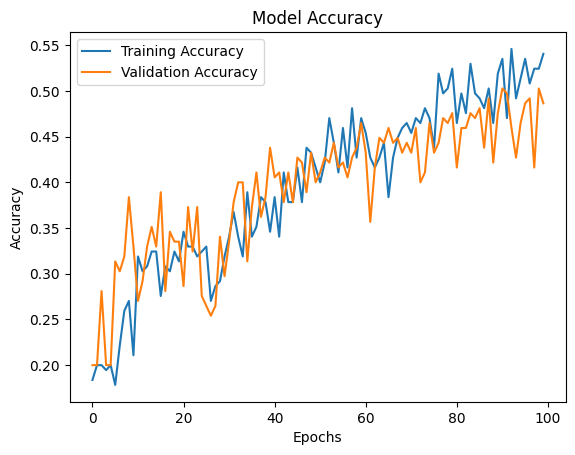

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

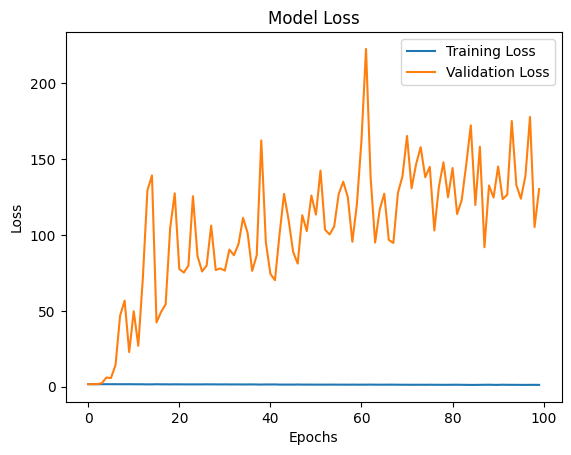

In [11]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define class names
classes = ['Acne','Actinic Keratosis','Basal Cell Carcinoma','Eczemaa','Rosacea']

# Preprocessing function
def preprocess_image(file_path):
    image = load_img(file_path, target_size=(64, 64))  # Match input size of the model
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Predict function
file_path = 'DATA/testing/Basal Cell Carcinoma/basal-cell-carcinoma-face-9.jpg'  # Replace with the path to your test image
image = preprocess_image(file_path)
prediction = model.predict(image)
predicted_class = classes[np.argmax(prediction)]
print(f"The predicted class is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted class is: Actinic Keratosis
